In [21]:
import torch
import torch.nn as nn

import einops

In [28]:
def single_head(query, key,value, drop_prob = 0.0):
    head_size = torch.tensor(query.shape[-1])
    # hand implementation
    # scale => sqrt head size
    scale = 1 / torch.sqrt(head_size)

    comm = einops.einsum(query, key ,"b t1 r, b t2 r -> b t1 t2")
    # equivalent to :
    # comm = query @ einops.rearrange(key , "batch token rep -> batch rep token")
    comm = comm * scale
    soft_comm = torch.softmax(comm, dim=2)
    att = soft_comm @ value
    print(att.shape)
    return torch.dropout(att,drop_prob, train=True)


g=torch.Generator().manual_seed(123)
query, key, value = torch.randn(2, 3, 8 , generator = g), torch.randn(2, 3, 8, generator = g), torch.randn(2, 3, 8 , generator = g)

# our implementation
ours  = single_head(query,key,value)

# pytorch implementation
theirs = nn.functional.scaled_dot_product_attention(query, key, value)
assert torch.allclose(ours,theirs)


torch.Size([2, 3, 8])


In [29]:
torch.allclose(ours,theirs)

True

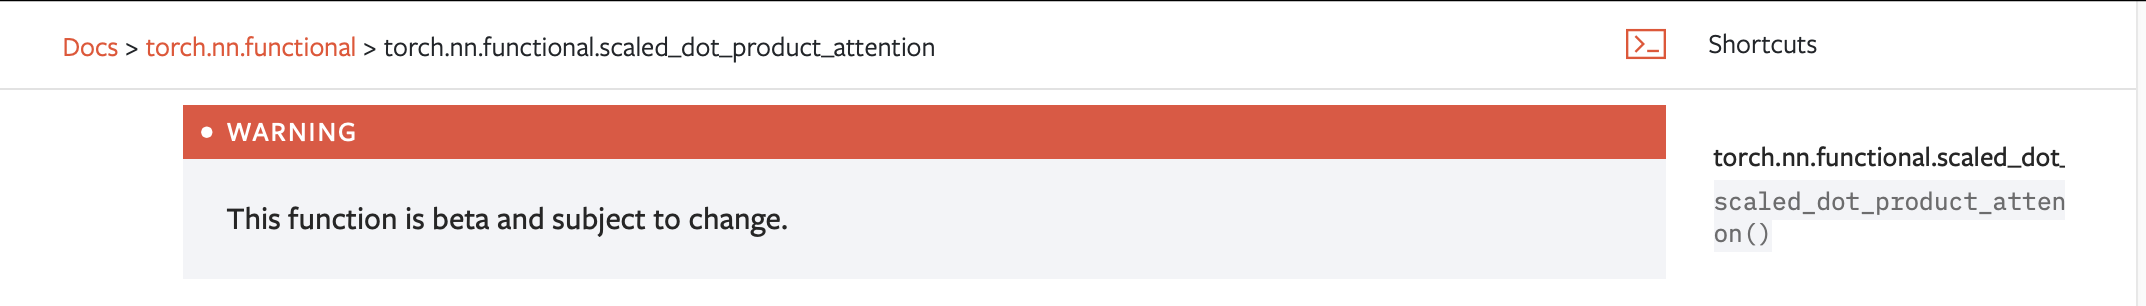

In [17]:
from IPython import display
display.Image("screenshot_attention_docs.png")